In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.max_rows', None)
matplotlib.style.use('classic')

# Aufgabe 1
Implementieren Sie die Funktionen aus dem Aufgabenblatt und plotten Sie diese für einen passenden Wertebereich um den Ursprung.

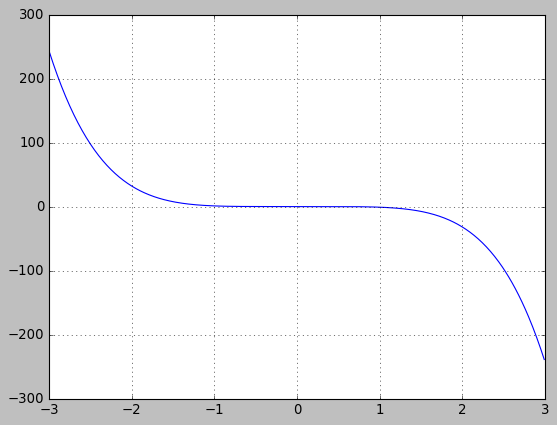

In [2]:
x = np.arange(-3, 3, 0.01)
y = -x**5
plt.plot(x, y, color = "blue")
plt.grid()
plt.show()

Text(0.5, 0, '$f$')

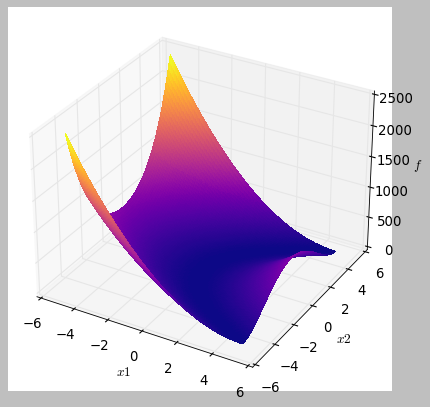

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X1 = np.linspace(-5, 5, 1000)
X2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(X1, X2)
Z = 25*X1**2-10*X1*X2**2 + X2**4

ax.plot_surface(X1, X2, Z, cmap=matplotlib.cm.plasma, linewidth=0, antialiased=False)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$f$')

# Aufgabe 3
Im ersten Schritt wird der Datensatz *cities* in Python geladen.

In [7]:
df = pd.read_excel('cities.xlsx')

b) Plotten Sie die Koordinaten der Städte (x-Achse Längengrad, y-Achse Breitengrad)

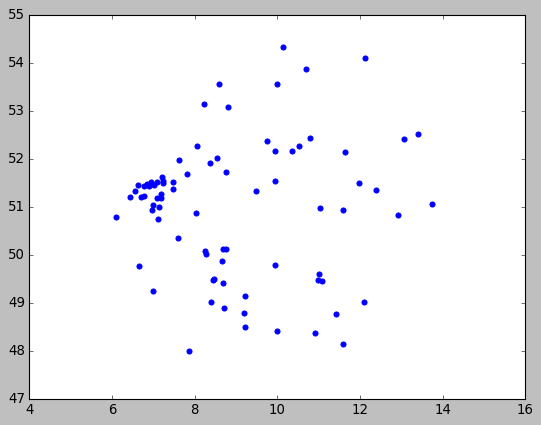

In [8]:
ax = plt.subplot()
ax.scatter("p1", "p2", data = df, color = "blue")

## d) Optimierungsmodell
Hinweis: Für die Installation und den Umgang mit **gurobipy** oder **scipy** schauen Sie sich am besten die Einführungen im Ilias an.

In [9]:
from gurobipy import Model, GRB, Var

Lösen Sie $P^l_{\lambda}$ mit $I=80$ und $l=\infty$.

In [10]:
m = Model("Cities_Model")

# Lambdas np array
lambdas = np.array(df["lambda"])

#Add Vars
x_1 = m.addVar(vtype = GRB.CONTINUOUS, name = "x_1")
x_2 = m.addVar(vtype = GRB.CONTINUOUS, name = "x_2")


# Intitalize empty betas vector
betas = np.empty(shape=len(df), dtype=Var)

for index, row in df.iterrows():
    betas[index] = beta = m.addVar(vtype = GRB.CONTINUOUS, name = "beta" + str(index))
    # Add constraints
    m.addConstr(row.p1-x_1 <= beta)
    m.addConstr(x_1-row.p1 <= beta)
    
    m.addConstr(row.p2-x_2 <= beta)
    m.addConstr(x_2-row.p2 <= beta)

    #add beta to betas list
m.update()

# Add objective function
m.setObjective(lambdas@betas)
m.update()

m.optimize()

Academic license - for non-commercial use only - expires 2022-06-28
Using license file C:\Users\morit\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 6 logical processors, using up to 6 threads
Optimize a model with 320 rows, 82 columns and 640 nonzeros
Model fingerprint: 0xc2b9091d
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-07, 5e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 5e+01]
Presolve time: 0.00s
Presolved: 320 rows, 82 columns, 640 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.794096e+03   0.000000e+00      0s
      89    2.2085062e+00   0.000000e+00   0.000000e+00      0s

Solved in 89 iterations and 0.00 seconds
Optimal objective  2.208506227e+00


Geben Sie einen optimalen Standort $x^*$ an und plotten Sie diesen in ihrem Plot aus Teil b).

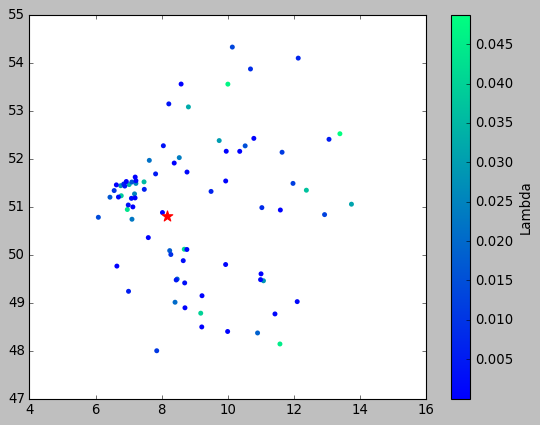

In [11]:
# Define colormap
cm = plt.cm.get_cmap("winter")
# plot given data
sc = plt.scatter("p1", "p2", data=df, c="lambda",  cmap=cm, linewidth=0)
# Add solution
plt.scatter(m.x[0],m.x[1], color = "red", marker="*", s=100)
# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Lambda")